# Experiment Corollary

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg

import os
from utils import experiments, results, evaluation
import visualization
import global_settings

## Run experiment

In [2]:
experiment = experiments.ExperimentSampleStandard(
    settings=experiments.settings.SettingsExperimentSample(
        output_path=global_settings.PATH_RESULTS,
        dataset=global_settings.DATASET_NAMES[1], # D_I
        dataset_normalization="standardization",
        hidden_layers=1, # 3
        hidden_neurons=3, # 16
        activation="tanh",
        activation_last_layer="none",
        num_warmup=2**10,
        statistic="reduced",
        statistic_p=0.99,
        samples_per_chain=1,
        identifiable_modes=3,
        pool_size=1,
        seed=0,
        overwrite_chains=None
    )
)

In [3]:
experiment.run()

model transformation parameters 10
number of chains: 1274


100%|████████████████████████████████████████████████████████████████████| 1274/1274 [1:23:08<00:00,  3.92s/it]


## Load existent experiment

## Compute KL divergences and PPD histories

In [4]:
kl_divergences, ppd_history = evaluation.kl_divergence_grid(experiment=experiment)

processed samples 0
processed samples 100
processed samples 200
processed samples 300
processed samples 400
processed samples 500
processed samples 600
processed samples 700
processed samples 800
processed samples 900
processed samples 1000
processed samples 1100
processed samples 1200


## Visualization

In [5]:
figure = visualization.KLDivergencePPDFigure()

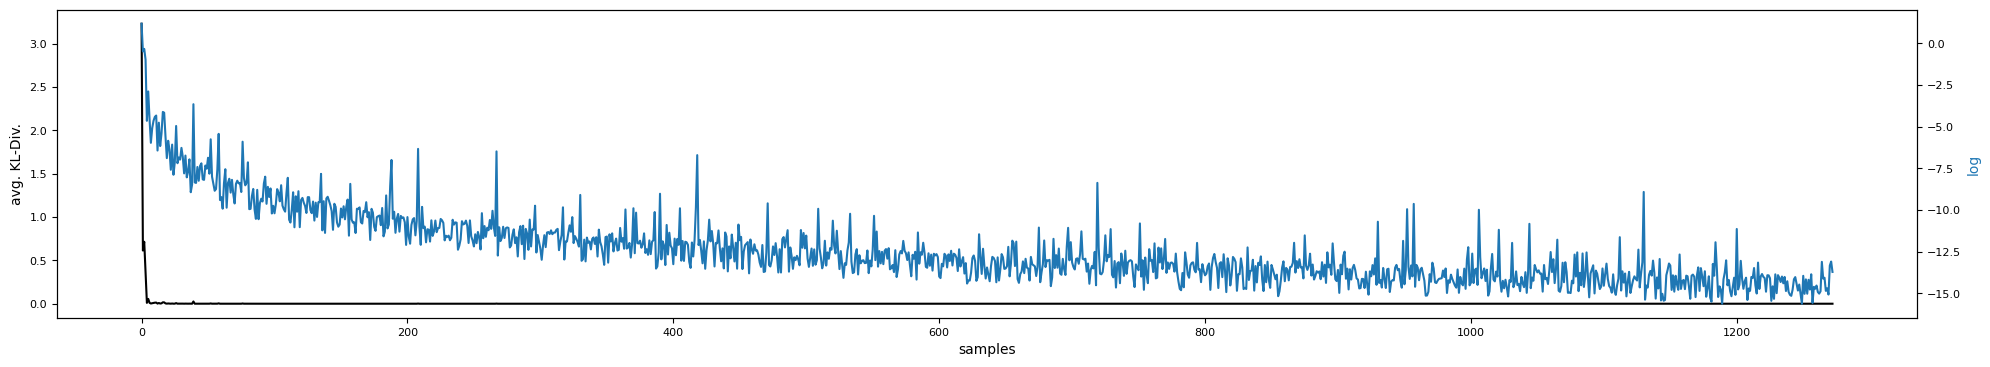

In [6]:
figure.plot(kl_divergences)

In [7]:
figure = visualization.PPDHistoryFigure()

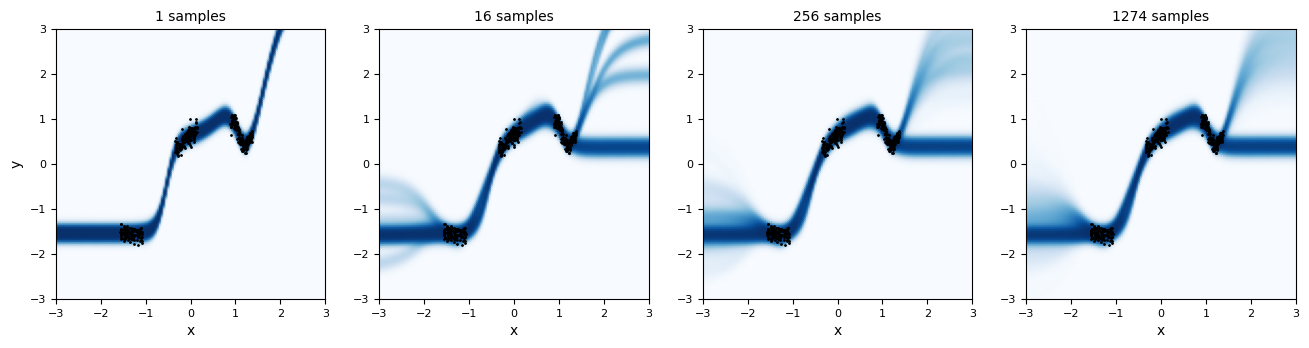

In [8]:
figure.plot(experiment, ppd_history, indices=[0, 15, 255, len(ppd_history) - 1])